# Training the Perceptron on Iris Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]
iris.head(3)

SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa

In [23]:
data = iris.loc[(iris["Class"] == "Iris-setosa") | (iris["Class"] == "Iris-versicolor"), ["SepalLength", "SepalWidth", "Class"]]
data.loc[data["Class"] == "Iris-setosa", "Class"] = 1
data.loc[data["Class"] == "Iris-versicolor", "Class"] = -1
data.head(3)

SepalLength  SepalWidth  Class
0          5.1         3.5      1
1          4.9         3.0      1
2          4.7         3.2      1

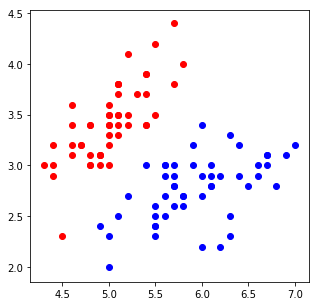

In [44]:
fig = plt.figure(figsize = (5,5))
axis = fig.add_subplot(1,1,1)
setosa = data.loc[data["Class"] == 1]
versi = data.loc[data["Class"] == -1]

axis.scatter(setosa["SepalLength"], setosa["SepalWidth"], color = "red")
axis.scatter(versi["SepalLength"], versi["SepalWidth"], color = "blue")

plt.show()

In [45]:
import Perceptron as ptr

X = data[["SepalLength", "SepalWidth"]].as_matrix()
Y = data["Class"].as_matrix()

classifier = ptr.Perceptron()
classifier.fit(X, Y)

weights = classifier.weights_
weights

array([ 207. , -130.7,  165.9])

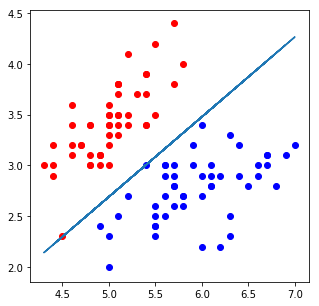

In [56]:
setosa = data.loc[data["Class"] == 1]
versi = data.loc[data["Class"] == -1]

fig = plt.figure(figsize = (5,5))
axis = fig.add_subplot(1,1,1)
axis.scatter(setosa["SepalLength"], setosa["SepalWidth"], color = "red")
axis.scatter(versi["SepalLength"], versi["SepalWidth"], color = "blue")
ys = [(-1) * (weights[0] / weights[2] + weights[1] / weights[2] * i) for i in data["SepalLength"]]
axis.plot(data["SepalLength"], ys)

plt.show()